### Preparation

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\dioog\Instacart Basket Analysis"

In [3]:
ords_prods_custs = pd.read_pickle(os.path.join(path, "02 Data", "02 Prepared data", "orders_products_customers.pkl"))

In [4]:
ords_prods_custs.shape

(9717350, 40)

In [5]:
ords_prods_custs.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0_x,Unnamed: 0.1.1,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,0,0,0,0,2539329,1,1,2,8,NaN,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,1,1,2398795,1,2,3,7,15.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,3,3,3,3,2254736,1,4,4,7,29.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,5,5,5,5,3367565,1,6,2,7,19.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,7,7,7,7,3108588,1,8,1,14,14.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both



### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [6]:
# The dataset includes the names of customer whiich is PII. 
# However, I was informed that the data is not real and was created by CF for the sake of the exercise. 


### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

##### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).


In [7]:
# creating column "region" 

result = []
for value in ords_prods_custs["state"]:
    if value == "Maine" or value == "New Hampshire" or value == "Vermont" or value == "Massachusetts" or value == "Rhode Island" or value == "Connecticut" or value == "New York" or value == "Pennsylvania" or value == "New Jersey" : 
        result.append("Northeast")      
    elif value == "Wisconsin" or value == "Michigan" or value == "Illinois" or value == "Indiana" or value == "Ohio" or value == "North Dakota" or value == "South Dakota" or value == "Nebraska" or value == "Kansas" or value == "Minnesota" or value == "Iowa" or value == "Missouri" :
        result.append("Midwest") 
    elif value == "Delaware" or value == "Maryland" or value == "District of Columbia" or value == "Virginia" or value == "West Virginia" or value == "North Carolina" or value == "South Carolina" or value == "Georgia" or value == "Florida" or value == "Kentucky" or value == "Tennessee" or value == "Mississippi" or value == "Alabama" or value == "Oklahoma" or value == "Texas" or value == "Arkansas" or value == "Louisiana" :
        result.append("South")
    elif value == "Idaho" or value == "Montana" or value == "Wyoming" or value == "Nevada" or value == "Utah" or value == "Colorado" or value == "Arizona" or value == "New Mexico" or value == "Alaska" or value == "Washington" or value == "Oregon" or value == "California" or value == "Hawaii" :   
        result.append("West")
    else:
        result.append("Not enough data")  

In [8]:
ords_prods_custs["region"] = result

In [9]:
ords_prods_custs["region"].value_counts (dropna = False)

South        3234541
West         2489515
Midwest      2278412
Northeast    1714882
Name: region, dtype: int64


###### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [10]:
ords_prods_custs.groupby("region")["Spending_flag"]

In [11]:
table1 = ords_prods_custs.groupby("region")["Spending_flag"]


In [12]:
table1.value_counts (dropna = False)

region     Spending_flag
Midwest    Low spender      2231455
           High spender       46957
Northeast  Low spender      1682385
           High spender       32497
South      Low spender      3171753
           High spender       62788
West       Low spender      2441742
           High spender       47773
Name: Spending_flag, dtype: int64

In [13]:
# alternative pivot

In [14]:
pd.pivot_table(ords_prods_custs, "avg_expense", ["region"], aggfunc=np.mean)

,avg_expense
region,
Midwest,12.718235
Northeast,11.510308
South,12.252007
West,11.332057


In [15]:
# Analysis suggests no substantial differences in spending habits between the different U.S. regions.


### The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [16]:
# creating the [orders_per_customer] column

ords_prods_custs["orders_per_customer"] = ords_prods_custs.groupby(["user_id"])["order_number"].transform("count")

In [17]:
ords_prods_custs.head()

,Unnamed: 0_x,Unnamed: 0.1,Unnamed: 0_x,Unnamed: 0.1.1,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,orders_per_customer
0,0,0,0,0,2539329,1,1,2,8,NaN,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,18
1,1,1,1,1,2398795,1,2,3,7,15.0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,18
2,3,3,3,3,2254736,1,4,4,7,29.0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,18
3,5,5,5,5,3367565,1,6,2,7,19.0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,18
4,7,7,7,7,3108588,1,8,1,14,14.0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,18


In [18]:
# creating exclusion flag

ords_prods_custs.loc[ords_prods_custs["orders_per_customer"] < 5, "low_activity_flag"] = "low-activity"

In [19]:
ords_prods_custs.loc[ords_prods_custs["orders_per_customer"] >= 5, "low_activity_flag"] = "regular-activity"

In [20]:
ords_prods_custs["low_activity_flag"].value_counts (dropna = False)

regular-activity    9677398
low-activity          39952
Name: low_activity_flag, dtype: int64

In [21]:
# dropping low activity customers

sample_of_regular_activity_costumers = ords_prods_custs.drop(ords_prods_custs[ords_prods_custs.low_activity_flag == "low-activity"].index)

In [22]:
sample_of_regular_activity_costumers["low_activity_flag"].value_counts (dropna = False)


regular-activity    9677398
Name: low_activity_flag, dtype: int64

In [23]:
# exporting sample

sample_of_regular_activity_costumers.to_pickle(os.path.join(path, "02 Data", "02 Prepared Data", "sample_of_regular_activity_costumers.pkl"))


### The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)


In [24]:
# Creating age profile

In [25]:
ords_prods_custs.loc[ords_prods_custs["age"] < 12, "profil_age"] = "0 - 11"

In [26]:
ords_prods_custs.loc[(ords_prods_custs["age"] >= 12) & (ords_prods_custs["age"] < 18), "profil_age"] = "12 - 17"


In [27]:
ords_prods_custs.loc[(ords_prods_custs["age"] >= 18) & (ords_prods_custs["age"] < 25), "profil_age"] = "18 – 24"

In [28]:
ords_prods_custs.loc[(ords_prods_custs["age"] >= 25) & (ords_prods_custs["age"] < 35), "profil_age"] = "25 – 34"

In [29]:
ords_prods_custs.loc[(ords_prods_custs["age"] >= 35) & (ords_prods_custs["age"] < 45), "profil_age"] = "35 – 44"

In [30]:
ords_prods_custs.loc[(ords_prods_custs["age"] >= 45) & (ords_prods_custs["age"] < 55), "profil_age"] = "45 – 54"

In [31]:
ords_prods_custs.loc[(ords_prods_custs["age"] >= 55) & (ords_prods_custs["age"] < 65), "profil_age"] = "55 – 64"

In [32]:
ords_prods_custs.loc[ords_prods_custs["age"] >= 65, "profil_age"] = "65+"

In [33]:
ords_prods_custs["profil_age"].value_counts (dropna = False)


65+        2569376
45 – 54    1532379
35 – 44    1517365
25 – 34    1516807
55 – 64    1508646
18 – 24    1072777
Name: profil_age, dtype: int64

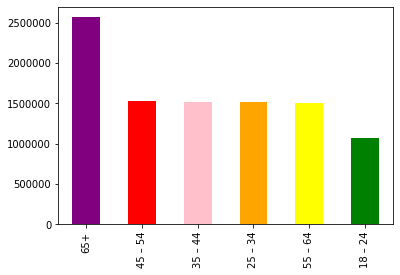

In [34]:
# creating a bar chart

Age_profile_count_bar = ords_prods_custs["profil_age"].value_counts().plot.bar(color =["purple", "red", "pink", "orange", "yellow", "green", "blue", "black"])

In [35]:
# Exporting image

Age_profile_count_bar.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "Age_profile_count_bar.png"))

In [36]:
# Creating income profile

In [37]:
ords_prods_custs["income"].describe().apply(lambda x: format(x, 'f'))

count    9717350.000000
mean       99422.105323
std        43037.646202
min        25903.000000
25%        66989.000000
50%        96595.000000
75%       127865.000000
max       593901.000000
Name: income, dtype: object

In [38]:
ords_prods_custs.loc[ords_prods_custs["income"] < 9875, "profile_income"] = "Low income"

In [39]:
ords_prods_custs.loc[(ords_prods_custs["income"] >= 9875) & (ords_prods_custs["income"] < 40124), "profile_income"] = "Medium income"

In [40]:
ords_prods_custs.loc[(ords_prods_custs["income"] >= 40125) & (ords_prods_custs["income"] < 85524), "profile_income"] = "High income"

In [41]:
ords_prods_custs.loc[ords_prods_custs["income"] >= 85525, "profile_income"] = "Very high income"

In [42]:
ords_prods_custs["profile_income"].value_counts (dropna = False)

Very high income    5875235
High income         3319858
Medium income        522226
NaN                      31
Name: profile_income, dtype: int64

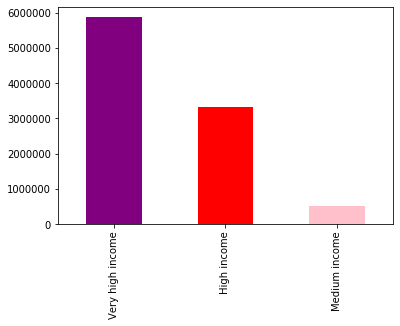

In [43]:
# creating a bar chart

income_profile_count_bar = ords_prods_custs["profile_income"].value_counts().plot.bar(color =["purple", "red", "pink", "orange"])

In [44]:
# Exporting image

income_profile_count_bar.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "income_profile_count_bar.png"))

In [45]:
# Creating number of dependents profile

In [46]:
ords_prods_custs["n_dependants"].describe().apply(lambda x: format(x, 'f'))

count    9717350.000000
mean           1.502175
std            1.118968
min            0.000000
25%            1.000000
50%            2.000000
75%            3.000000
max            3.000000
Name: n_dependants, dtype: object

In [47]:
ords_prods_custs.loc[ords_prods_custs["n_dependants"] == 0, "profile_n_dependants"] = "No dependants"

In [48]:
ords_prods_custs.loc[ords_prods_custs["n_dependants"] == 1, "profile_n_dependants"] = "One dependant"

In [49]:
ords_prods_custs.loc[ords_prods_custs["n_dependants"] == 2, "profile_n_dependants"] = "Two dependants"

In [50]:
ords_prods_custs.loc[ords_prods_custs["n_dependants"] == 3, "profile_n_dependants"] = "Three dependants"

In [51]:
ords_prods_custs.loc[ords_prods_custs["n_dependants"] >= 4, "profile_n_dependants"] = "Four or more dependants"

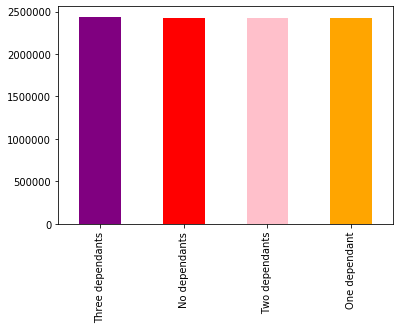

In [52]:
# creating a bar chart

n_dependants_profile_count_bar = ords_prods_custs["profile_n_dependants"].value_counts().plot.bar(color =["purple", "red", "pink", "orange", "black"])

In [53]:
# Exporting image

n_dependants_profile_count_bar.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "n_dependants_profile_count_bar.png"))

In [54]:
# Creating pet-owner profile

In [55]:
# importing departments dataset

departments = pd.read_csv(os.path.join(path, "02 Data", "02 Prepared data", "departments_wrangled.csv"))

In [56]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [57]:
ords_prods_custs.loc[ords_prods_custs["department_id"] == 7, "profile_pet_owner"] = "Yes"

In [58]:
ords_prods_custs.loc[ords_prods_custs["department_id"] != 7, "profile_pet_owner"] = "No"

In [59]:
ords_prods_custs["profile_pet_owner"].value_counts (dropna = False)

No     8911128
Yes     806222
Name: profile_pet_owner, dtype: int64

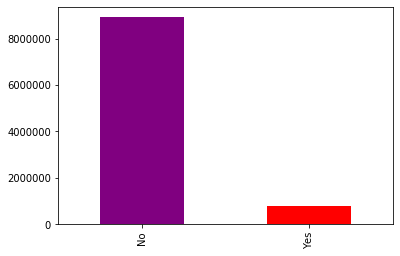

In [60]:
# creating a bar chart

profile_pet_owner_count_bar = ords_prods_custs["profile_pet_owner"].value_counts().plot.bar(color =["purple", "red"])

In [61]:
# Exporting image

profile_pet_owner_count_bar.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "profile_pet_owner_count_bar.png"))

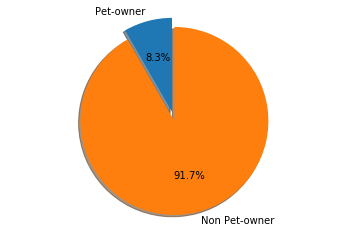

In [62]:
# creating a Pie chart

labels = "Pet-owner", "Non Pet-owner"
sizes = [8.3, 91.7]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [63]:
# Aggregating the max, mean, and min variables on the age profile level for usage frequency.

pd.pivot_table(ords_prods_custs, "median_frequency", ["profil_age"], aggfunc=[np.max, np.mean, np.min])

,amax,mean,amin
,median_frequency,median_frequency,median_frequency
profil_age,,,
18 – 24,30.0,10.356496,0.0
25 – 34,30.0,10.444004,0.0
35 – 44,30.0,10.361923,0.0
45 – 54,30.0,10.415027,0.0
55 – 64,30.0,10.449398,0.0
65+,30.0,10.365282,0.0


In [64]:
# Aggregating the max, mean, and min variables on the age profile level for usage expenditure.

pd.pivot_table(ords_prods_custs, "avg_expense", ["profil_age"], aggfunc=[np.max, np.mean, np.min])

,amax,mean,amin
,avg_expense,avg_expense,avg_expense
profil_age,,,
18 – 24,10209.987755,12.309891,1.3
25 – 34,12506.925000,12.017862,1.1
35 – 44,25005.425000,11.615841,1.0
45 – 54,15006.940000,12.135697,1.1
55 – 64,8703.400000,12.371731,1.5
65+,14042.512281,11.767869,1.0


### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [65]:
crosstab_age_region = pd.crosstab(ords_prods_custs["region"], ords_prods_custs["profil_age"], dropna = False)

In [66]:
crosstab_age_region.to_clipboard()

In [67]:
crosstab_income_region = pd.crosstab(ords_prods_custs["region"], ords_prods_custs["profile_income"], dropna = False)

In [68]:
crosstab_income_region.to_clipboard()

In [69]:
crosstab_PetOwner_region = pd.crosstab(ords_prods_custs["region"], ords_prods_custs["profile_pet_owner"], dropna = False)

In [70]:
crosstab_PetOwner_region.to_clipboard()

In [71]:
crosstab_dependants_region = pd.crosstab(ords_prods_custs["region"], ords_prods_custs["profile_n_dependants"], dropna = False)

In [72]:
crosstab_dependants_region.to_clipboard()

In [73]:
crosstab_age_department = pd.crosstab(ords_prods_custs["department_id"], ords_prods_custs["profil_age"], dropna = False)

In [74]:
crosstab_age_department.to_clipboard()

In [75]:
crosstab_income_department = pd.crosstab(ords_prods_custs["department_id"], ords_prods_custs["profile_income"], dropna = False)

In [76]:
crosstab_income_department.to_clipboard()

In [77]:
crosstab_dependants_department = pd.crosstab(ords_prods_custs["department_id"], ords_prods_custs["profile_n_dependants"], dropna = False)

In [78]:
crosstab_dependants_department.to_clipboard()

### Produce suitable charts to illustrate your results and export them in your project folder.

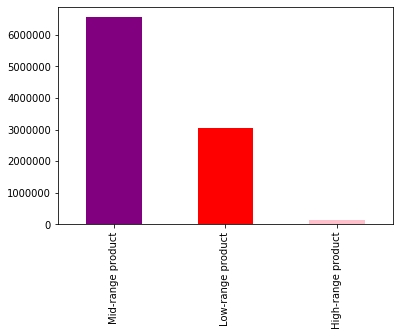

In [79]:
# creating a bar chart for "price_range_loc"

price_range_loc_bar = ords_prods_custs["price_range_loc"].value_counts().plot.bar(color =["purple", "red", "pink"])

In [80]:
# Exporting image

price_range_loc_bar.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "price_range_loc_bar.png"))

In [81]:
# creating visualization for "which departments have the highest frequency of product orders?"

In [82]:
pd.pivot_table(ords_prods_custs, "order_id", ["department_id"], aggfunc=np.size)

,order_id
department_id,
1,670341
2,10945
3,350789
4,2842121
5,46303
6,80584
7,806222
8,29352
9,259733


In [83]:
Pivot_freq_orders_by_department = pd.pivot_table(ords_prods_custs, "order_id", ["department_id"], aggfunc=np.size)

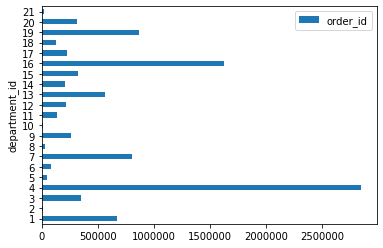

In [84]:
freq_orders_by_department = Pivot_freq_orders_by_department.plot(kind="barh")

In [85]:
# Exporting image

freq_orders_by_department.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "freq_orders_by_department.png"))

Text(0, 0.5, 'Department ID')

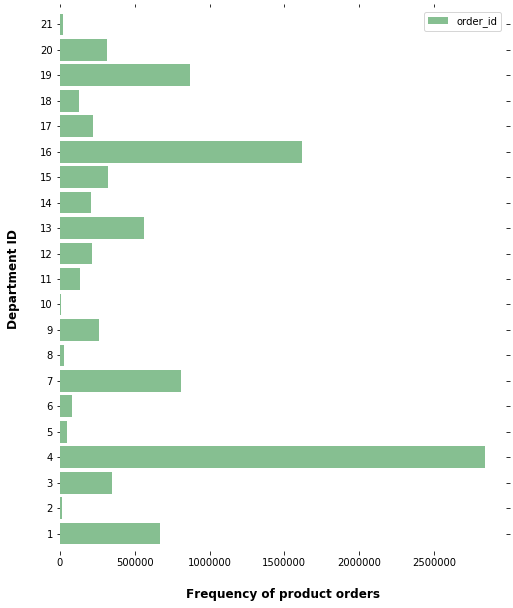

In [86]:
freq_orders_by_department2 = Pivot_freq_orders_by_department.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)
freq_orders_by_department2.spines['right'].set_visible(False)
freq_orders_by_department2.spines['top'].set_visible(False)
freq_orders_by_department2.spines['left'].set_visible(False)
freq_orders_by_department2.spines['bottom'].set_visible(False)
freq_orders_by_department2.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
freq_orders_by_department2.set_xlabel("Frequency of product orders", labelpad=20, weight='bold', size=12)
freq_orders_by_department2.set_ylabel("Department ID", labelpad=20, weight='bold', size=12)

In [87]:
# Exporting image

freq_orders_by_department2.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "freq_orders_by_department2.png"))

In [88]:
# Creating visualization "What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?"

In [89]:
pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["profil_age"], aggfunc=np.mean)

,days_since_prior_order
profil_age,
18 – 24,11.052626
25 – 34,11.168001
35 – 44,11.074184
45 – 54,11.096351
55 – 64,11.147324
65+,11.076789


In [90]:
Table_Brand_loyalty_1 = pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["profil_age"], aggfunc=np.mean)

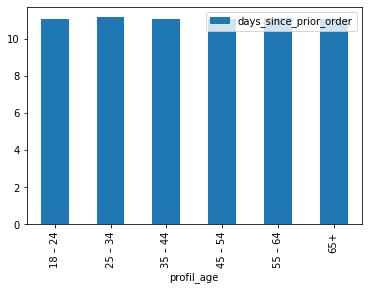

In [91]:
Graph_Brand_loyalty_1 = Table_Brand_loyalty_1.plot(kind="bar")

In [92]:
# Exporting image

Graph_Brand_loyalty_1.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "Graph_Brand_loyalty_1.png"))

In [93]:
pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["profile_income"], aggfunc=np.mean)

,days_since_prior_order
profile_income,
High income,11.114606
Medium income,11.676118
Very high income,11.044388


In [94]:
Table_Brand_loyalty_2 = pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["profile_income"], aggfunc=np.mean)

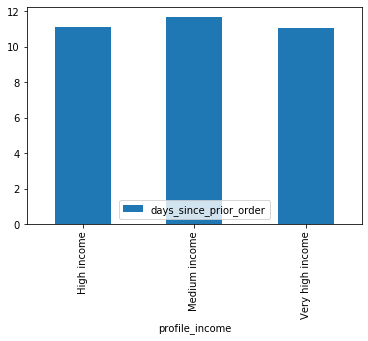

In [95]:
Graph_Brand_loyalty_2 = Table_Brand_loyalty_2.plot(kind="bar")

In [96]:
# Exporting image

Graph_Brand_loyalty_2.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "Graph_Brand_loyalty_2.png"))

In [97]:
pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["region"], aggfunc=np.mean)

,days_since_prior_order
region,
Midwest,11.184524
Northeast,11.066265
South,11.105749
West,11.046239


In [98]:
Table_Brand_loyalty_3 = pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["region"], aggfunc=np.mean)

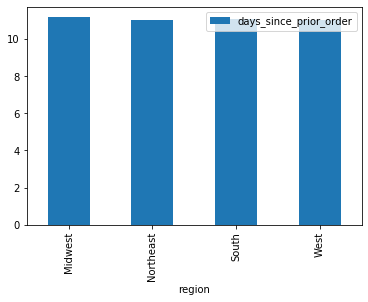

In [99]:
Graph_Brand_loyalty_3 = Table_Brand_loyalty_3.plot(kind="bar")

In [100]:
# Exporting image

Graph_Brand_loyalty_3.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "Graph_Brand_loyalty_3.png"))

In [101]:
# Creating visualization for "Are there differences in ordering habits based on a customer’s loyalty status?"

In [102]:
pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["Loyalty_flag"], aggfunc=np.mean)

,days_since_prior_order
Loyalty_flag,
Loyal customer,6.024399
New customer,17.973895
Regular customer,12.156946


In [103]:
Table_Brand_loyalty_4 = pd.pivot_table(ords_prods_custs, "days_since_prior_order", ["Loyalty_flag"], aggfunc=np.mean)

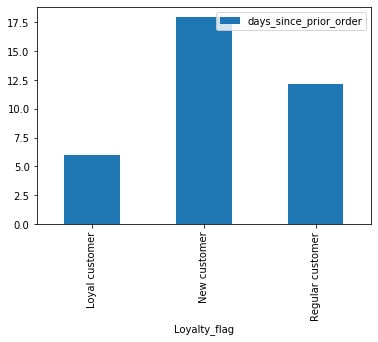

In [104]:
Graph_Brand_loyalty_4 = Table_Brand_loyalty_4.plot(kind="bar")

In [105]:
# Exporting image

Graph_Brand_loyalty_4.figure.savefig(os.path.join(path, "04 Analysis", "03 Visualizations", "Graph_Brand_loyalty_4.png"))

In [106]:
# Exporting ords_prods_custs

ords_prods_custs.to_pickle(os.path.join(path, "02 Data", "02 Prepared Data", "ords_prods_custs_v2.pkl"))